# Lab1 QR Algorithm#

## 代码部分 ##

In [1]:
# -*- coding: utf-8 -*-
# !usr/bin/env python3 
"""
-------------------------------------------------
   File Name:     lab1_QR
   Description :
   Author :       Yuwei Liu
   date：          2018/5/21
-------------------------------------------------
   Change Activity:
                   2018/5/23:
-------------------------------------------------
"""

import numpy as np
from scipy.linalg import hilbert
import math

In [2]:
A = np.array([[10, 7, 8, 7],
              [7, 5, 6, 5],
              [8, 6, 10, 9],
              [7, 5, 9, 10]])
B = np.array([[2, 3, 4, 5, 6],
              [4, 4, 5, 6, 7],
              [0, 3, 6, 7, 8],
              [0, 0, 2, 8, 9],
              [0, 0, 0, 1, 0]])
H_6 = hilbert(6)
""" 利用函数生成这个Hilbert matrix
[[1.         0.5        0.33333333 0.25       0.2        0.16666667]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1       ]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909]]
"""

In [3]:
EPSILON = 1e-10  # 定义误差敏感度

In [4]:
def check_stop_iter(mat):
    """
    判断一下是否达到了停止迭代的条件
    :param mat: A_{k}
    :return:  True 为达到停止迭代的条件
    """
    r, c = mat.shape
    for j in range(c):
        for i in range(j+1, r):
            if abs(mat[i][j]) >= EPSILON:
                return False
    return True

In [5]:
def qr_algorithm(mat):
    """
    Using QR decomposition iteration to find eigenvalue of `mat`.
    通过QR迭代法，将矩阵mat变为一个相似于mat的上三角矩阵
    其对角线的元素就是mat的特征值
    :param mat:
    :return:
    """
    A_k = mat
    stop = False
    V = np.identity(mat.shape[0])
    # print("----------- start iteration --------------")
    while not stop:
        Q, R = np.linalg.qr(A_k)
        V = np.dot(V, Q)
        A_k = np.dot(R, Q)
        stop = check_stop_iter(A_k)
    # print("----------- stop iteration ---------------")
    eigenvalue = [A_k[i][i] for i in range(min(A_k.shape))]
    return A_k, eigenvalue, V

In [6]:
def cal_condition_num(mat):
    """
    通过计算矩阵的奇异值来求解矩阵的2-norm condition number
    :param mat:
    :return:
    """
    _, singular_value, _ = qr_algorithm(np.dot(np.transpose(mat), mat))
    return math.sqrt(singular_value[0]/singular_value[-1])

In [7]:
def main(mat):
    # a) 通过QR法迭代使矩阵收敛到上三角矩阵，并且得到主对角线上的特征值
    A_k, eigenvalue_qr, _ = qr_algorithm(mat)
    print("迭代后生成的矩阵A_k为:\n%s" % A_k)
    print("通过迭代法找到的矩阵特征值为:\n%s" % " ".join([str(v) for v in sorted(eigenvalue_qr)]))
    eigenvalue, eigenvector = np.linalg.eig(mat)
    print("通过函数直接求得的矩阵特征值为:\n", " ".join([str(v) for v in sorted(eigenvalue)]))

    # b) 计算矩阵的2-norm condition number
    print("通过函数直接计算得到的矩阵的2-norm condition number 为:      ", np.linalg.cond(mat))
    cond = cal_condition_num(mat)
    print("迭代法计算奇异值，再计算矩阵的2-norm condition number结果为: ", cond)

## 如何计算矩阵的2-norm condition number ##
矩阵的2范数，或者谱范数的定义为 $\Vert A\Vert_{2} = \sqrt{\rho{(A^{H}A)}} $. 按照定义，矩阵的2范数条件数等于 $\sqrt{\frac{\mu _{1}}{\mu _{n}})} $, 其中$\mu _{1}$ 和 $\mu _{n}$是$A^{H}A$的最大和最小的特征值

## 运行结果 & 实验结果分析 ##


In [8]:
main(A)

迭代后生成的矩阵A_k为:
[[ 3.02886853e+01  7.07685610e-15 -1.95543613e-15  7.71574689e-16]
 [ 2.39537050e-15  3.85805746e+00  2.62581967e-11 -9.05850402e-16]
 [ 1.91688748e-26  2.62560426e-11  8.43107150e-01 -1.78096048e-15]
 [ 3.04098958e-61 -2.30070007e-46  1.07862752e-34  1.01500484e-02]]
通过迭代法找到的矩阵特征值为:
0.010150048397891057 0.8431071498550311 3.8580574559449525 30.288685345802122
通过函数直接求得的矩阵特征值为:
 0.010150048397889211 0.8431071498550319 3.8580574559449508 30.2886853458021
通过函数直接计算得到的矩阵的2-norm condition number 为:       2984.092701675755
迭代法计算奇异值，再计算矩阵的2-norm condition number结果为:  2984.092702339914


In [9]:
main(B)

迭代后生成的矩阵A_k为:
[[ 1.31723514e+01 -1.12224333e+01  1.38327301e+00  1.22876570e+01
   2.18439170e+00]
 [-1.21146443e-12  6.55187835e+00 -1.45097272e+00 -5.46614904e+00
  -4.24112904e-01]
 [ 0.00000000e+00 -1.99331255e-25  1.59565457e+00 -3.44534395e-01
   2.00394783e+00]
 [ 0.00000000e+00  0.00000000e+00  6.92252792e-11 -9.29096278e-01
  -2.94914968e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.08214501e-16
  -3.90788045e-01]]
通过迭代法找到的矩阵特征值为:
-0.929096277761744 -0.39078804541648804 1.5956545731593825 6.5518783519177175 13.17235139810113
通过函数直接求得的矩阵特征值为:
 -0.9290962777522975 -0.3907880454164876 1.595654573149939 6.55187835191566 13.172351398103185
通过函数直接计算得到的矩阵的2-norm condition number 为:       103.31039330100934
迭代法计算奇异值，再计算矩阵的2-norm condition number结果为:  103.31039330100532


In [10]:
main(H_6)

迭代后生成的矩阵A_k为:
[[ 1.61889986e+00  2.14376244e-11 -1.24867884e-16 -8.28626258e-17
   2.61248093e-17 -1.35962449e-17]
 [ 2.14375843e-11  2.42360871e-01  1.80485487e-16 -3.45411876e-20
   1.27670160e-17  1.52848806e-17]
 [ 1.26823982e-26  1.94026745e-16  1.63215213e-02 -9.38477237e-18
   4.59625940e-18  6.03968200e-18]
 [-4.21062700e-45 -7.18337808e-35 -9.12570985e-21  6.15748354e-04
   6.52812883e-18  3.06867062e-18]
 [-4.28720535e-67 -7.70464997e-57 -1.16509861e-42  1.26538526e-25
   1.25707571e-05 -3.58686766e-20]
 [-4.39395899e-94 -8.12775617e-84 -1.34875248e-69  1.82106680e-52
   3.02700446e-32  1.08279948e-07]]
通过迭代法找到的矩阵特征值为:
1.0827994844393853e-07 1.2570757122641285e-05 0.0006157483541826463 0.01632152131987584 0.2423608705752094 1.6188998589243386
通过函数直接求得的矩阵特征值为:
 1.0827994844739511e-07 1.2570757122654954e-05 0.0006157483541826439 0.016321521319875833 0.24236087057520964 1.6188998589243382
通过函数直接计算得到的矩阵的2-norm condition number 为:       14951058.642466014
迭代法计算奇异值，再计算矩阵的2-norm con

**从以上结果可以看出，矩阵经过迭代，收敛于一个上三角矩阵；对于对称的矩阵，矩阵经过迭代得到了一个对角矩阵。**

# Lab2 PCA#
## a) 证明题 ##
①求证$D$对角线上的非零元素，就是∑的非零特征值：

根据书上定理1.26可知，对于$ A\in C^{m\times n}$, $A^{H}A$和$AA^{H}$的非零特征值相同。

因为 $\Sigma = \frac{1}{m}\tilde{X}\tilde{X}^{T} = (\frac{1}{\sqrt{m}}\tilde{X})(\frac{1}{\sqrt{m}}\tilde{X}^{T})$, $VDV^{T}= \frac{1}{m}\tilde{X}^{T}\tilde{X}= (\frac{1}{\sqrt{m}}\tilde{X}^{T})(\frac{1}{\sqrt{m}}\tilde{X})$, 所以他们拥有相同的非零特征值。

又因为$D$的对角线元素为$\frac{1}{m}\tilde{X}^{T}\tilde{X}$的特征值，所以$D$非零的对角线元素就是$\Sigma$的非零特征值。

②求证$\tilde{X}V$的列向量是$\Sigma$的特征向量，并且互相正交：
$$
\Sigma = \frac{1}{m}\tilde{X}\tilde{X}^{T} \tag{a.1}
$$
$$
\frac{1}{m}\tilde{X}^{T}\tilde{X} = VDV^{T} \tag{a.2}
$$

$$
(\Sigma)(\tilde{X}V) \\= ( \frac{1}{m}\tilde{X}\tilde{X}^{T})(\tilde{X}V)\\ = ( \tilde{X})(\frac{1}{m}\tilde{X}^{T}\tilde{X})V\\=\tilde{X}(VDV^{T})V \\=   \tilde{X}VD(V^{T}V )\\= \tilde{X}VD \tag{a.3}
$$


记$\tilde{X}V =[v_1, v_2, ..,v_m] ,D=diag(\lambda_1, \lambda_2, ..., \lambda_m) $

则根据(a.3)可得: $\Sigma(\tilde{X}V) = [\Sigma v_1, \Sigma v_2, ..,\Sigma v_m] = (\tilde{X}V) D = [\lambda_1v_1, \lambda_2v_2, ..., \lambda_mv_m]$

由 $[\Sigma v_1, \Sigma v_2, ..,\Sigma v_m] = [\lambda_1v_1, \lambda_2v_2, ..., \lambda_mv_m]$, 即证$\tilde{X}V$的列向量是$\Sigma$的特征向量

因为 $(\tilde{X}V)^{T}\tilde{X}V = V^{T}(\tilde{X}^{T}\tilde{X})V = mV^{T}VDV^{T}V = mD$, 
又因为D是对角矩阵, 所以$\tilde{X}V$的列向量互相正交

## b) 利用QR Algorithm求解$\Sigma$的特征值与特征向量 ##
通过 `QR Algorithm` 我们可以分解$A$矩阵得到一个上三角矩阵$T$，即Schur分解, 公式可以表达为$A=QTQ^{T}$。 公式两边转置之后可以得到$A^{T}=QT^{T}Q^{T}$, 则对于对称矩阵$A$可以得到$T=T^{T}$, 即$T$为一个对角矩阵. 根据第一个实验我们也可以验证，对于对称的矩阵$A$，通过 `QR Algorithm` 迭代足够多的次数，记为$n$次之后，可以收敛得到一个对角矩阵$A^{(n)}$，并且此时的$A^{(n)}$矩阵对角线上的元素即为$A$的特征值。

每次迭代中QR分解的操作为 :
$$
A^{(i)} = Q^{(i)}R^{(i)} \\
A^{(i+1)} = R^{(i)}Q^{(i)}
$$
记$Q = Q^{(0)}Q^{(1)}...Q^{(n)}$, 则$ AQ=AQ^{(0)}Q^{(1)}...Q^{(n)}=Q^{(0)}(R^{(0)}Q^{(0)})Q^{(1)}...Q^{(n)} = Q^{(0)}A^{(1)}Q^{(1)}...Q^{(n)}$. 
递推可得: $AQ = QA^{(n)}$，又因为$A^{(n)}$是对角线元素为特征值的对角矩阵，且$Q$为正交矩阵，所以$Q$的列向量是$A$的特征向量。

所以可以通过计算QR Algorithm得到$\frac{1}{m}\tilde{X}^{T}\tilde{X}$的特征向量矩阵$V$, 实验二的a)中证明了$\tilde{X}V$是$\Sigma$的特征向量，因此可以进一步计算得到$\Sigma$的特征向量
### 代码与特征向量可视化的结果 ###

In [11]:
# -*- coding: utf-8 -*-
# !usr/bin/env python3 
"""
-------------------------------------------------
   File Name:     lab2_PCA
   Description :
   Author :       Yuwei Liu
   date：          2018/5/21
-------------------------------------------------
   Change Activity:
                   2018/5/29:
-------------------------------------------------
"""
import time
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot
# from lab1_QR import qr_algorithm
from scipy.linalg import hessenberg

In [12]:
X = loadmat("yale_face.mat")['X']  # 4096 * 165 读取数据集
n, m = X.shape

In [13]:
# First step: centralized at origin
mu = np.mean(X, axis=1).reshape(-1, 1)
X_tilde = X-mu
sigma = np.dot(X_tilde, np.transpose(X_tilde))/m  # shape=(4,664, 4,664) Sigma矩阵

In [14]:
# Second step: find eigenvalue and eigenvector dot(X^{T}, X)/m
left = np.dot(np.transpose(X_tilde), X_tilde)/m  # shape=(165, 165)
start_time = time.time()  # 计算QR迭代法需要计算的时间
_, eigenvalue, V = qr_algorithm(left)
# np.save("eigenvalue", eigenvalue);  np.save("V", V)
# eigenvalue = np.load("eigenvalue.npy"); V = np.load("V.npy")
D = np.diag(eigenvalue)  # 构造D矩阵， 虽然后面用不到这个矩阵
eigenvector = np.dot(X_tilde, V)  # shape=(4,664, 165) ∑的特征向量
time_span = time.time() - start_time  # 136.11510396003723秒
print("没有转化为 Hessenberg matrix之前, 计算QR迭代需要%s秒" % time_span)

没有转化为 Hessenberg matrix之前, 计算QR迭代需要181.10138273239136秒


In [15]:
K = 5  # 取出前5个最大的特征值
indices = np.argsort([abs(ev) for ev in eigenvalue])[::-1]
print("找到的前K个最大特征值对应的列下标为: ", indices[:K])
print("找到的前K个最大特征值为: ", )
for i in indices[:K]:
    print("%s " % eigenvalue[indices[i]])

找到的前K个最大特征值对应的列下标为:  [0 1 2 3 4]
找到的前K个最大特征值为: 
2079027.7226285518 
1298008.6883944399 
1103050.5743164462 
521634.6074887566 
472853.65092813765 


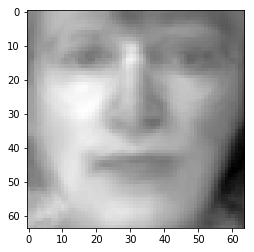

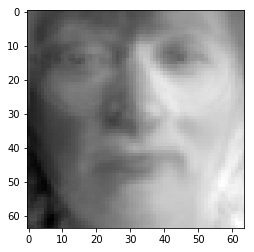

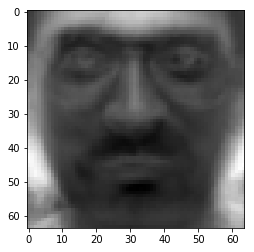

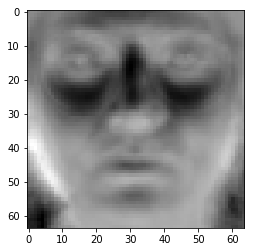

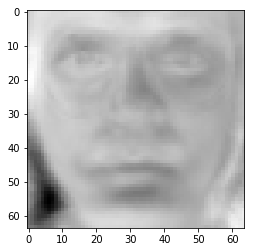

In [16]:
for i in indices[:K]:
    x = eigenvector[:, i]
    # 可视化一下数据集
    pyplot.imshow(np.reshape(x, newshape=(64, 64), order="F"), cmap='gray')
    pyplot.pause(1)
    # pyplot.savefig("./图片/特征向量可视化_%s.jpg" % i)
    pyplot.close("all")

## c) 先相似于Hessenberg矩阵, 再计算QR Algorithm迭代 ##
对于对称矩阵$A$(即$\frac{1}{m}\tilde{X}^{T}\tilde{X}$), 有$A = PHP^{T}$(via computing Hessenberg form) 且 $H = Q_{H}DQ_{H}^{T}$(via QR Algorithm)可知$A$与$H$相似所以有相同的特征值，这些特征值$\lambda$位于对角矩阵$D$的对角线上, 其中$H$的特征向量为$Q_{H}$的列向量, 记为$q_{h}$.

对于$A$矩阵的特征向量$q$有:$$Aq=\lambda q \tag{c.1}$$ 又因为$$Hq_{h}=\lambda q_{h}\tag{c.2}$$ 且 $$H =P^{T}AP \tag{c.3}$$
将(c.3)带入(c.2)可得:
$$
P^{T}APq_{h} = \lambda q_{h} \tag{c.4}
$$

$P$左乘(c.4) 得到 $$A(Pq_{h}) = \lambda (Pq_{h}) \tag{c.5}$$

所以此时$A$的特征向量为$(P q_{h})$. 即计算$A$矩阵 Hessenberg form时用到的$P$矩阵, 左乘$H$矩阵的特征向量$q_{h}$

### 代码与特征向量可视化的结果 ###

In [17]:
# c) Convert dot(X^{T}, X)/m to Hessenberg before QR algorithm
H, P = hessenberg(left, calc_q=True)  # A = PHP^T
start_time = time.time()  # 计算QR迭代法需要计算的时间
_, eigenvalue, V = qr_algorithm(H)  # X^{t}X的特征向量和对应的特征值
time_span = time.time() - start_time  # 33.80924034118652秒
print("转化为 Hessenberg matrix之后, 计算QR迭代需要%s秒" % time_span)

转化为 Hessenberg matrix之后, 计算QR迭代需要55.76835870742798秒


In [18]:
# np.save("eigenvalue_H", eigenvalue); np.save("V_H", V)
# eigenvalue = np.load("eigenvalue_H.npy"); V = np.load("V_H.npy")
eigenvector = np.dot(X_tilde, np.dot(P, V))  # shape=(4,664, 165) ∑的特征向量, 通过P映射V矩阵得到
indices = np.argsort([abs(ev) for ev in eigenvalue])[::-1]
print("找到的前K个最大特征值对应的列下标为: ", indices[:K])
print("找到的前K个最大特征值为: ")
for i in indices[:K]:
    print("%s " % eigenvalue[indices[i]])

找到的前K个最大特征值对应的列下标为:  [0 1 2 3 4]
找到的前K个最大特征值为: 
2079027.7226285508 
1298008.6883944448 
1103050.574316447 
521634.60748875554 
472853.65092813876 


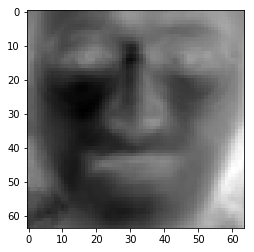

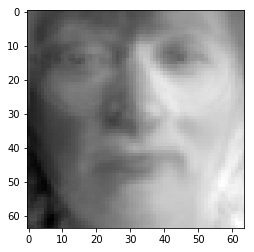

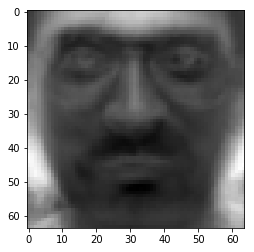

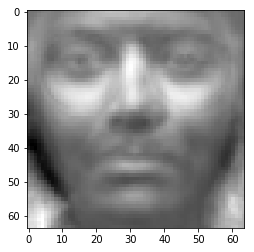

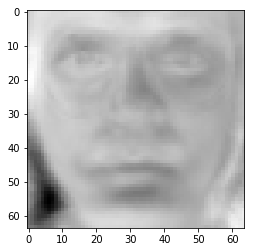

In [19]:
for i in indices[:K]:
    x = eigenvector[:, i]
    # 可视化一下数据集
    pyplot.imshow(np.reshape(x, newshape=(64, 64), order="F"), cmap='gray')
    pyplot.pause(1)
    # pyplot.savefig("./图片/特征向量可视化H_%s.jpg" % i)
    pyplot.close("all")